## **Project Name**: Youtube Video Analysis and Prediction
## **Group Members**:
*   17CP024 - Dhruvil Kotecha
*   17CP027 - Parth Narodia

### **Subject**: Machine Learning - CP462
      

##  

### Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from nltk.stem import PorterStemmer
import nltk
from sklearn.metrics import r2_score

### Dataset Loading

In [3]:
youtube = pd.read_csv("INvideos.csv")

In [4]:
youtube.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
2,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
3,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...
4,il_pSa5l98w,17.14.11,"MCA (Middle Class Abbayi) TEASER - Nani,Sai Pa...",Dil Raju,24,2017-11-10T04:29:50.000Z,"Nenu Local|""Nenu Local Telugu Movie""|""Nani""|""S...",6106669,98612,4185,4763,https://i.ytimg.com/vi/il_pSa5l98w/default.jpg,False,False,False,Watch MCA- Middle Class Abbayi First Look Teas...


In [5]:
print(youtube.shape)

(37351, 16)


In [6]:
print(youtube.isnull().values.any())

True


In [7]:
youtube = youtube.dropna(how='any',axis=0)

In [8]:
youtube.describe()

,category_id,views,likes,dislikes,comment_count
count,36790.000000,3.679000e+04,3.679000e+04,3.679000e+04,36790.000000
mean,21.552079,1.071503e+06,2.745142e+04,1.685385e+03,2714.095814
std,6.586781,3.207192e+06,9.783253e+04,1.619754e+04,14978.311211
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.000000
25%,23.000000,1.255975e+05,8.792500e+02,1.090000e+02,83.000000
50%,24.000000,3.078245e+05,3.126000e+03,3.310000e+02,336.000000
75%,24.000000,8.066388e+05,1.409500e+04,1.032000e+03,1314.750000
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000


In [9]:
youtube.drop(['video_id','thumbnail_link'],axis=1,inplace=True)

In [10]:
youtube.apply(lambda x: len(x.unique()))

trending_date               205
title                     16431
channel_title              1390
category_id                  17
publish_time              16053
tags                      12463
views                     31637
likes                     15473
dislikes                   5072
comment_count              6024
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description               13992
dtype: int64

False    35611
True      1179
Name: comments_disabled, dtype: int64


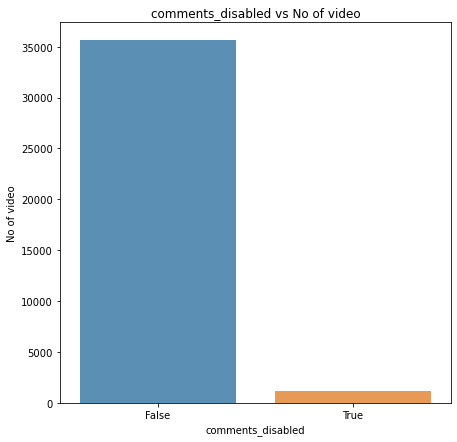

False    36033
True       757
Name: ratings_disabled, dtype: int64


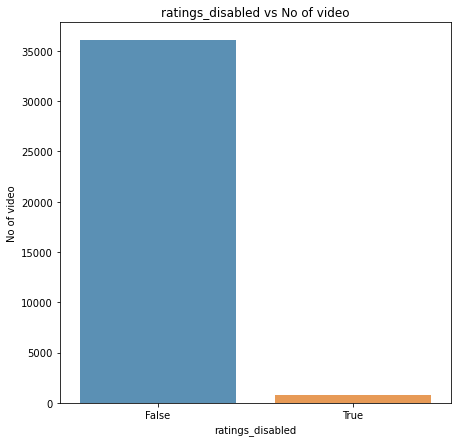

False    36779
True        11
Name: video_error_or_removed, dtype: int64


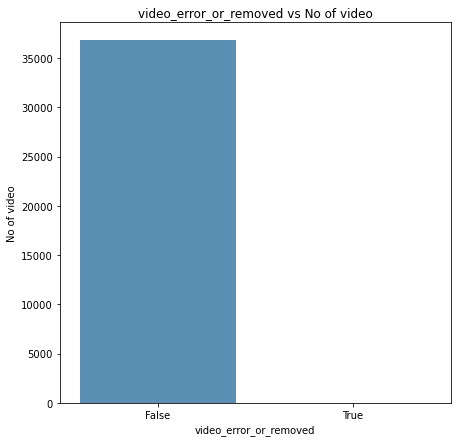

24    16462
25     5172
10     3857
23     3407
22     2494
1      1649
27     1180
26      837
17      712
28      548
43      205
29      105
2        69
20       66
30       16
19        8
15        3
Name: category_id, dtype: int64


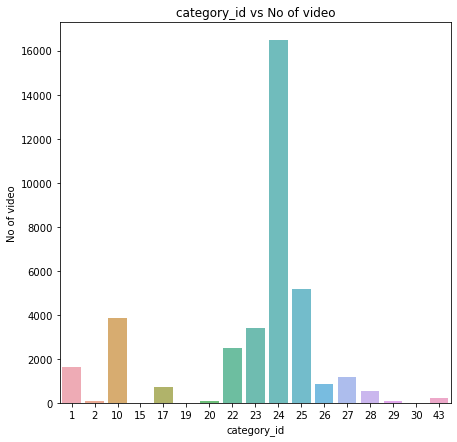

In [11]:
for x in (['comments_disabled','ratings_disabled','video_error_or_removed','category_id']):
    count=youtube[x].value_counts()
    print(count)
    plt.figure(figsize=(7,7))
    sns.barplot(count.index, count.values, alpha=0.8)
    plt.title('{} vs No of video'.format(x))
    plt.ylabel('No of video')
    plt.xlabel('{}'.format(x))
    plt.show()

### Feature Engineering

In [12]:
tags=[x.count("|")+1 for x in youtube["tags"]]
youtube["No_tags"]=tags


In [13]:
desc_len=[len(x) for x in youtube["description"]]
youtube["desc_len"]=desc_len

In [14]:
title_len=[len(x) for x in youtube["title"]]
youtube["len_title"]=title_len

In [15]:
publish_time = pd.to_datetime(youtube['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
youtube['publish_time'] = publish_time.dt.time
youtube['publish_date'] = publish_time.dt.date

#day at which video is publish
youtube['publish_weekday']=publish_time.dt.day_name()

In [16]:
youtube["Ratio_View_likes"]=round(youtube["views"]/youtube["likes"],3)
#ratio of view/dislikes  upto 3 decimal
youtube["Ratio_View_dislikes"]=round(youtube["views"]/youtube["dislikes"],3)
#ratio of view/comment_count  upto 3 decimal
youtube["Ratio_views_comment_count"]=round(youtube["views"]/youtube["comment_count"],3)
#ratio of likes/dislikes  upto 3 decimal
youtube["Ratio_likes_dislikes"]=round(youtube["likes"]/youtube["dislikes"],3)

In [17]:
print(max(youtube["Ratio_View_likes"]))
print(max(youtube["Ratio_View_dislikes"]))
print(max(youtube["Ratio_views_comment_count"]))
print(max(youtube["Ratio_likes_dislikes"]))

inf
inf
inf
inf


In [18]:
youtube=youtube.replace([np.inf, -np.inf], np.nan)
youtube = youtube.dropna(how='any',axis=0)

In [19]:
youtube['publish_weekday'] = youtube['publish_weekday'].replace({'Monday':1,
                                                             'Tuesday':2,
                                                             'Wednesday':3,
                                                             'Thursday':4,
                                                             'Friday':5,
                                                             'Saturday':6,
                                                             'Sunday':7})

5    5871
6    5399
4    5295
1    4996
2    4919
3    4780
7    3820
Name: publish_weekday, dtype: int64


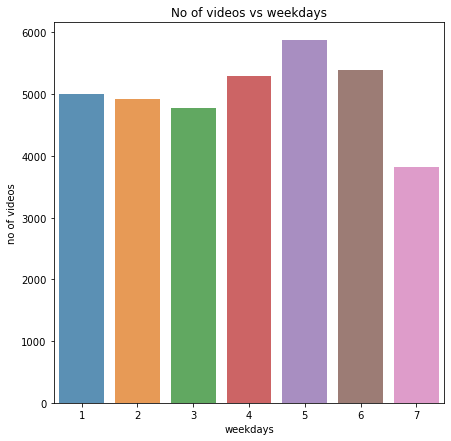

In [20]:
count=youtube["publish_weekday"].value_counts()
print(count)
plt.figure(figsize=(7,7))
sns.barplot(count.index, count.values, alpha=0.8)
plt.title('No of videos vs weekdays')
plt.ylabel('no of videos')
plt.xlabel('weekdays')
plt.show()

### Correlation Matrix

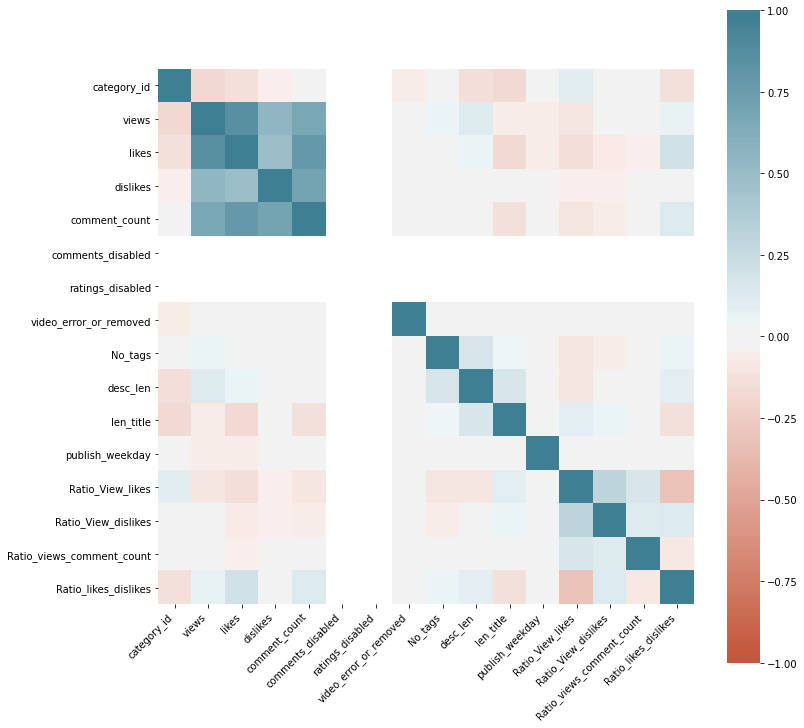

In [21]:
data = youtube

corr = data.corr()
plt.figure(figsize=(12, 12))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [22]:
youtube.drop(['trending_date','publish_date','publish_time','tags','title','description','channel_title'],axis=1,inplace=True)

### Prediction

#### Prediction of Views

In [23]:
views=youtube['views']
youtube_view=youtube.drop(['views'],axis=1,inplace=False)

In [24]:
train,test,y_train,y_test=train_test_split(youtube_view,views, test_size=0.2,shuffle=False)

In [25]:
print(train.shape,test.shape,y_train.shape,y_test.shape)

(28064, 15) (7016, 15) (28064,) (7016,)


In [28]:
# LINEAR REGRESSION

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(train, y_train)

# predicting the  test set results
y_pred = model.predict(test)
print('Root means score', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
d1 = {'True Labels': y_test, 'Predicted Labels': y_pred}
SK = pd.DataFrame(data = d1)
print(SK)

Root means score 1480538.0274786167
Variance score: 0.73
       True Labels  Predicted Labels
30095      1980262     948840.351214
30096       483593     333688.487673
30097       356468     522149.346790
30098       403986    -653290.364504
30099       682308     717386.697641
...            ...               ...
37346       214378     619744.678276
37347       406828    -210326.845601
37348       386319     377509.905664
37349       130263     190274.171510
37350      1278249     844418.604672

[7016 rows x 2 columns]


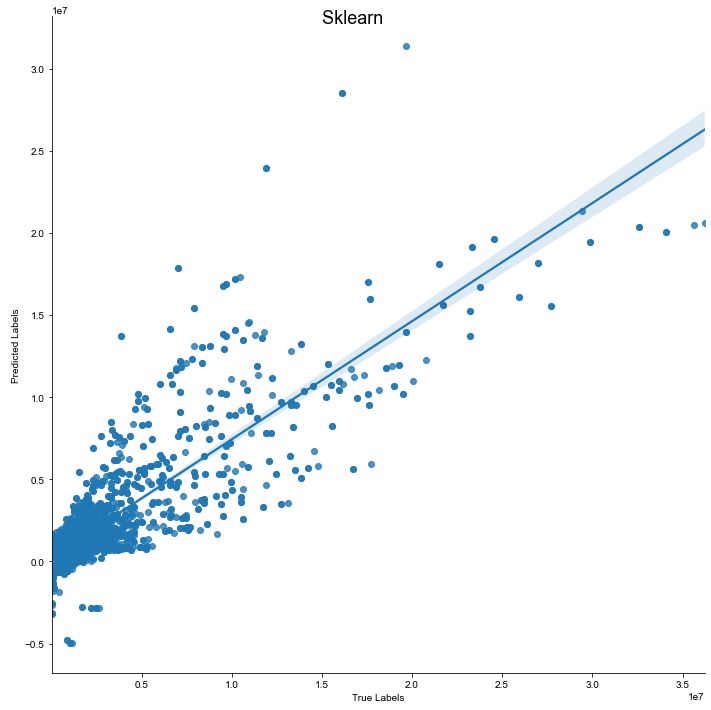

In [27]:
lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = SK, size = 10)
fig1 = lm1.fig 
fig1.suptitle("Sklearn ", fontsize=18)
sns.set(font_scale = 1.5)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed: 13.6min finished


Best HyperParameter:  {'max_depth': 10, 'n_estimators': 140}
0.9383237748734201


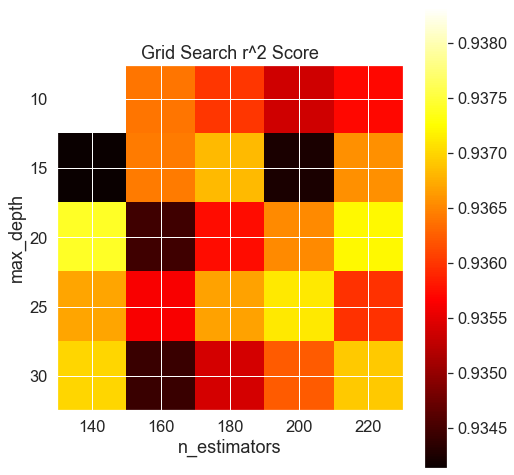

In [ ]:
from sklearn.ensemble import RandomForestRegressor
nEstimator = [140,160,180,200,220]
depth = [10,15,20,25,30]

RF = RandomForestRegressor()
hyperParam = [{'n_estimators':nEstimator,'max_depth': depth}]
gsv = GridSearchCV(RF,hyperParam,cv=5,verbose=1,scoring='r2',n_jobs=-1)
gsv.fit(train, y_train)
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)
scores = gsv.cv_results_['mean_test_score'].reshape(len(nEstimator),len(depth))
plt.figure(figsize=(8, 8))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.colorbar()
plt.xticks(np.arange(len(nEstimator)), nEstimator)
plt.yticks(np.arange(len(depth)), depth)
plt.title('Grid Search r^2 Score')
plt.show()
maxDepth=gsv.best_params_['max_depth']
nEstimators=gsv.best_params_['n_estimators']

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = nEstimators,max_depth=maxDepth)
model.fit(train, y_train)


# predicting the  test set results
y_pred = model.predict(test)
print('Root means score', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Result :",model.score(test, y_test))
d1 = {'True Labels': y_test, 'Predicted Labels': y_pred}
SK = pd.DataFrame(data = d1)
print(SK)

Root means score 305299.09707834723
Variance score: 0.99
Result : 0.9887040272938998
       True Labels  Predicted Labels
30096      1980262      1.901304e+06
30097       483593      4.617765e+05
30098       356468      3.716864e+05
30099       403986      3.988706e+05
30100       682308      6.895348e+05
...            ...               ...
37347       214378      2.146553e+05
37348       406828      3.987261e+05
37349       386319      3.916035e+05
37350       130263      1.420305e+05
37351      1278249      1.259144e+06

[7016 rows x 2 columns]


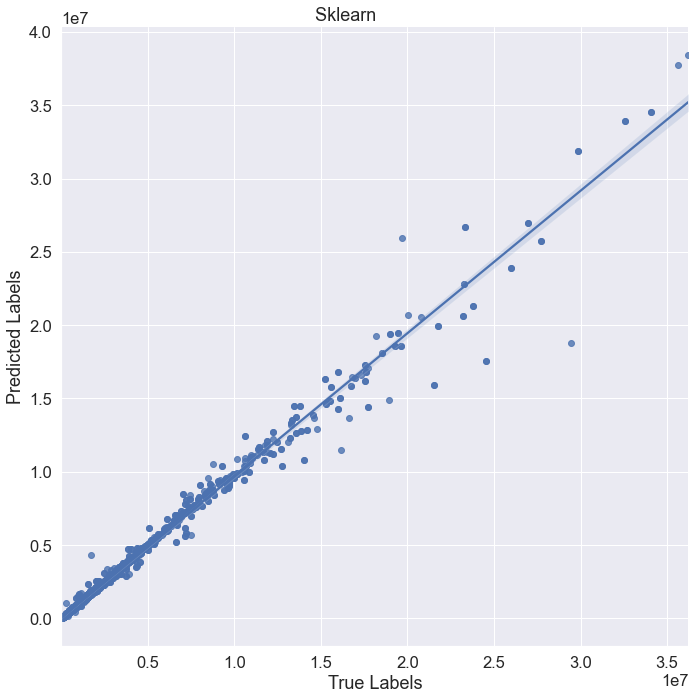

In [ ]:
lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = SK, size = 10)
fig1 = lm1.fig 
fig1.suptitle("Sklearn ", fontsize=18)
sns.set(font_scale = 1.5)

### Prediction of Likes

In [ ]:
likes=youtube['likes']
youtube_like=youtube.drop(['likes'],axis=1,inplace=False)

In [ ]:
train,test,y_train,y_test=train_test_split(youtube_like,likes, test_size=0.2,shuffle=False)

In [ ]:
print(train.shape,test.shape,y_train.shape,y_test.shape)

(28064, 15) (7016, 15) (28064,) (7016,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(train, y_train)

# predicting the  test set results
y_pred = model.predict(test)
print('Root means score', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Result :",model.score(test, y_test))
d1 = {'True Labels': y_test, 'Predicted Labels': y_pred}
SK = pd.DataFrame(data = d1)
print(SK)

Root means score 64199.508813508444
Variance score: 0.42
Result : 0.42347439442618673
       True Labels  Predicted Labels
30096        18135      63351.293880
30097        22049      25276.952541
30098         1688       8811.714636
30099         2547      10647.123862
30100        32180      27967.295986
...            ...               ...
37347         3291      -3667.938177
37348         1726      25625.501919
37349         1216      11351.760369
37350          698       3389.138850
37351        22466      22524.780870

[7016 rows x 2 columns]


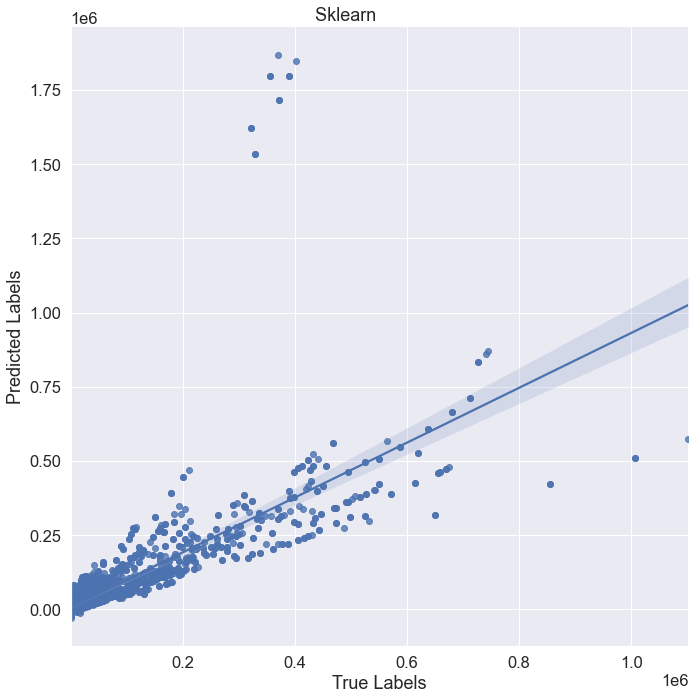

In [ ]:
lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = SK, size = 10)
fig1 = lm1.fig 
fig1.suptitle("Sklearn ", fontsize=18)
sns.set(font_scale = 1.5)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed: 12.4min finished


Best HyperParameter:  {'max_depth': 15, 'n_estimators': 140}
0.9498683959131856


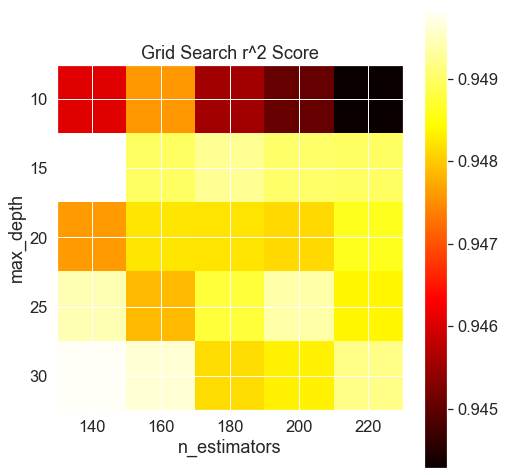

In [ ]:
from sklearn.ensemble import RandomForestRegressor

nEstimator = [140,160,180,200,220]
depth = [10,15,20,25,30]

RF = RandomForestRegressor()
hyperParam = [{'n_estimators':nEstimator,'max_depth': depth}]
gsv = GridSearchCV(RF,hyperParam,cv=5,verbose=1,scoring='r2',n_jobs=-1)
gsv.fit(train, y_train)
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)
scores = gsv.cv_results_['mean_test_score'].reshape(len(nEstimator),len(depth))

plt.figure(figsize=(8, 8))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.colorbar()
plt.xticks(np.arange(len(nEstimator)), nEstimator)
plt.yticks(np.arange(len(depth)), depth)
plt.title('Grid Search r^2 Score')
plt.show()
maxDepth=gsv.best_params_['max_depth']
nEstimators=gsv.best_params_['n_estimators']


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = nEstimators,max_depth=maxDepth)
model.fit(train, y_train)


# predicting the  test set results
y_pred = model.predict(test)
print('Root means score', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Result :",model.score(test, y_test))
d1 = {'True Labels': y_test, 'Predicted Labels': y_pred}
SK = pd.DataFrame(data = d1)
print(SK)

Root means score 18263.811151872942
Variance score: 0.95
Result : 0.953340722914159
       True Labels  Predicted Labels
30096        18135      18474.933351
30097        22049      21791.658209
30098         1688       1735.740651
30099         2547       2537.718564
30100        32180      32073.783928
...            ...               ...
37347         3291       3266.742449
37348         1726       1731.725634
37349         1216       1383.328377
37350          698        695.430308
37351        22466      22194.765734

[7016 rows x 2 columns]


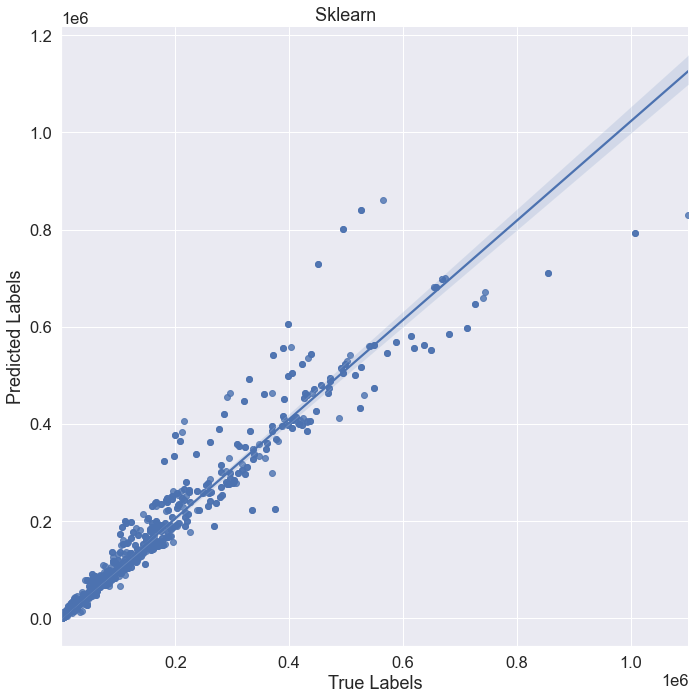

In [ ]:
lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = SK, size = 10)
fig1 = lm1.fig 
fig1.suptitle("Sklearn ", fontsize=18)
sns.set(font_scale = 1.5)

## **References:**


*   Dataset: *INVideos.csv*, Kaggle, https://www.kaggle.com/data/INvideos.csv
*   Yuping Li, Kent Eng, Liqian Zhang, "*YouTube Videos Prediction: Will this video be popular?*", Stanford University, 2019, Stanford, CA 94305, [Online], Available:http://cs229.stanford.edu/proj2019aut/data/assignment_308832_raw/26647615.pdf

